In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
#data_history = []

In [4]:
print('Importation des librairies...')
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
print('Librairies importées')

Importation des librairies...
Librairies importées


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('eurusd_15mn_1Y.csv')
dataframe = dataframe.iloc[:,1:]
dataframe.head()

Date      Open      High       Low     Close  Volume
0  20180506  23:15:00  1.195975  1.196370  1.195975  1.196155      -1
1  20180506  23:30:00  1.196155  1.196205  1.196020  1.196060      -1
2  20180506  23:45:00  1.196060  1.196325  1.195575  1.195805      -1
3  20180507  00:00:00  1.195805  1.196170  1.195780  1.195980      -1
4  20180507  00:15:00  1.195980  1.196360  1.195960  1.196255      -1

In [7]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
dataframe.iplot(x='Date',y=['Close','High','Low'])

In [8]:
dataframe = dataframe[['Close']]
dataframe = dataframe.reset_index(drop = True)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.head()

Close
0  1.196155
1  1.196060
2  1.195805
3  1.195980
4  1.196255

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
epochs_custom = 10
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epochs_custom, batch_size=1, verbose=1)

W0521 09:31:02.433279 4589884864 deprecation.py:506] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0521 09:31:02.898216 4589884864 deprecation.py:323] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
16401/16401 [==============================] - 39s 2ms/sample - loss: 0.0015
Epoch 2/10
16401/16401 [==============================] - 38s 2ms/sample - loss: 6.0669e-05
Epoch 3/10
16401/16401 [==============================] - 39s 2ms/sample - loss: 5.8313e-05
Epoch 4/10
16401/16401 [==============================] - 38s 2ms/sample - loss: 5.9086e-05
Epoch 5/10
16401/16401 [==============================] - 38s 2ms/sample - loss: 5.7994e-05
Epoch 6/10
16401/16401 [==============================] - 40s 2ms/sample - loss: 5.7237e-05
Epoch 7/10
16401/16401 [==============================] - 38s 2ms/sample - loss: 5.8045e-05
Epoch 8/10
16401/16401 [==============================] - 39s 2ms/sample - loss: 5.6799e-05
Epoch 9/10
16401/16401 [==============================] - 40s 2ms/sample - loss: 5.5891e-05
Epoch 10/10
16401/16401 [==============================] - 41s 2ms/sample - loss: 5.5100e-05


In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(1000*(trainY[0]), 1000*trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(1000*testY[0], 1000*testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.59 RMSE
Test Score: 0.43 RMSE


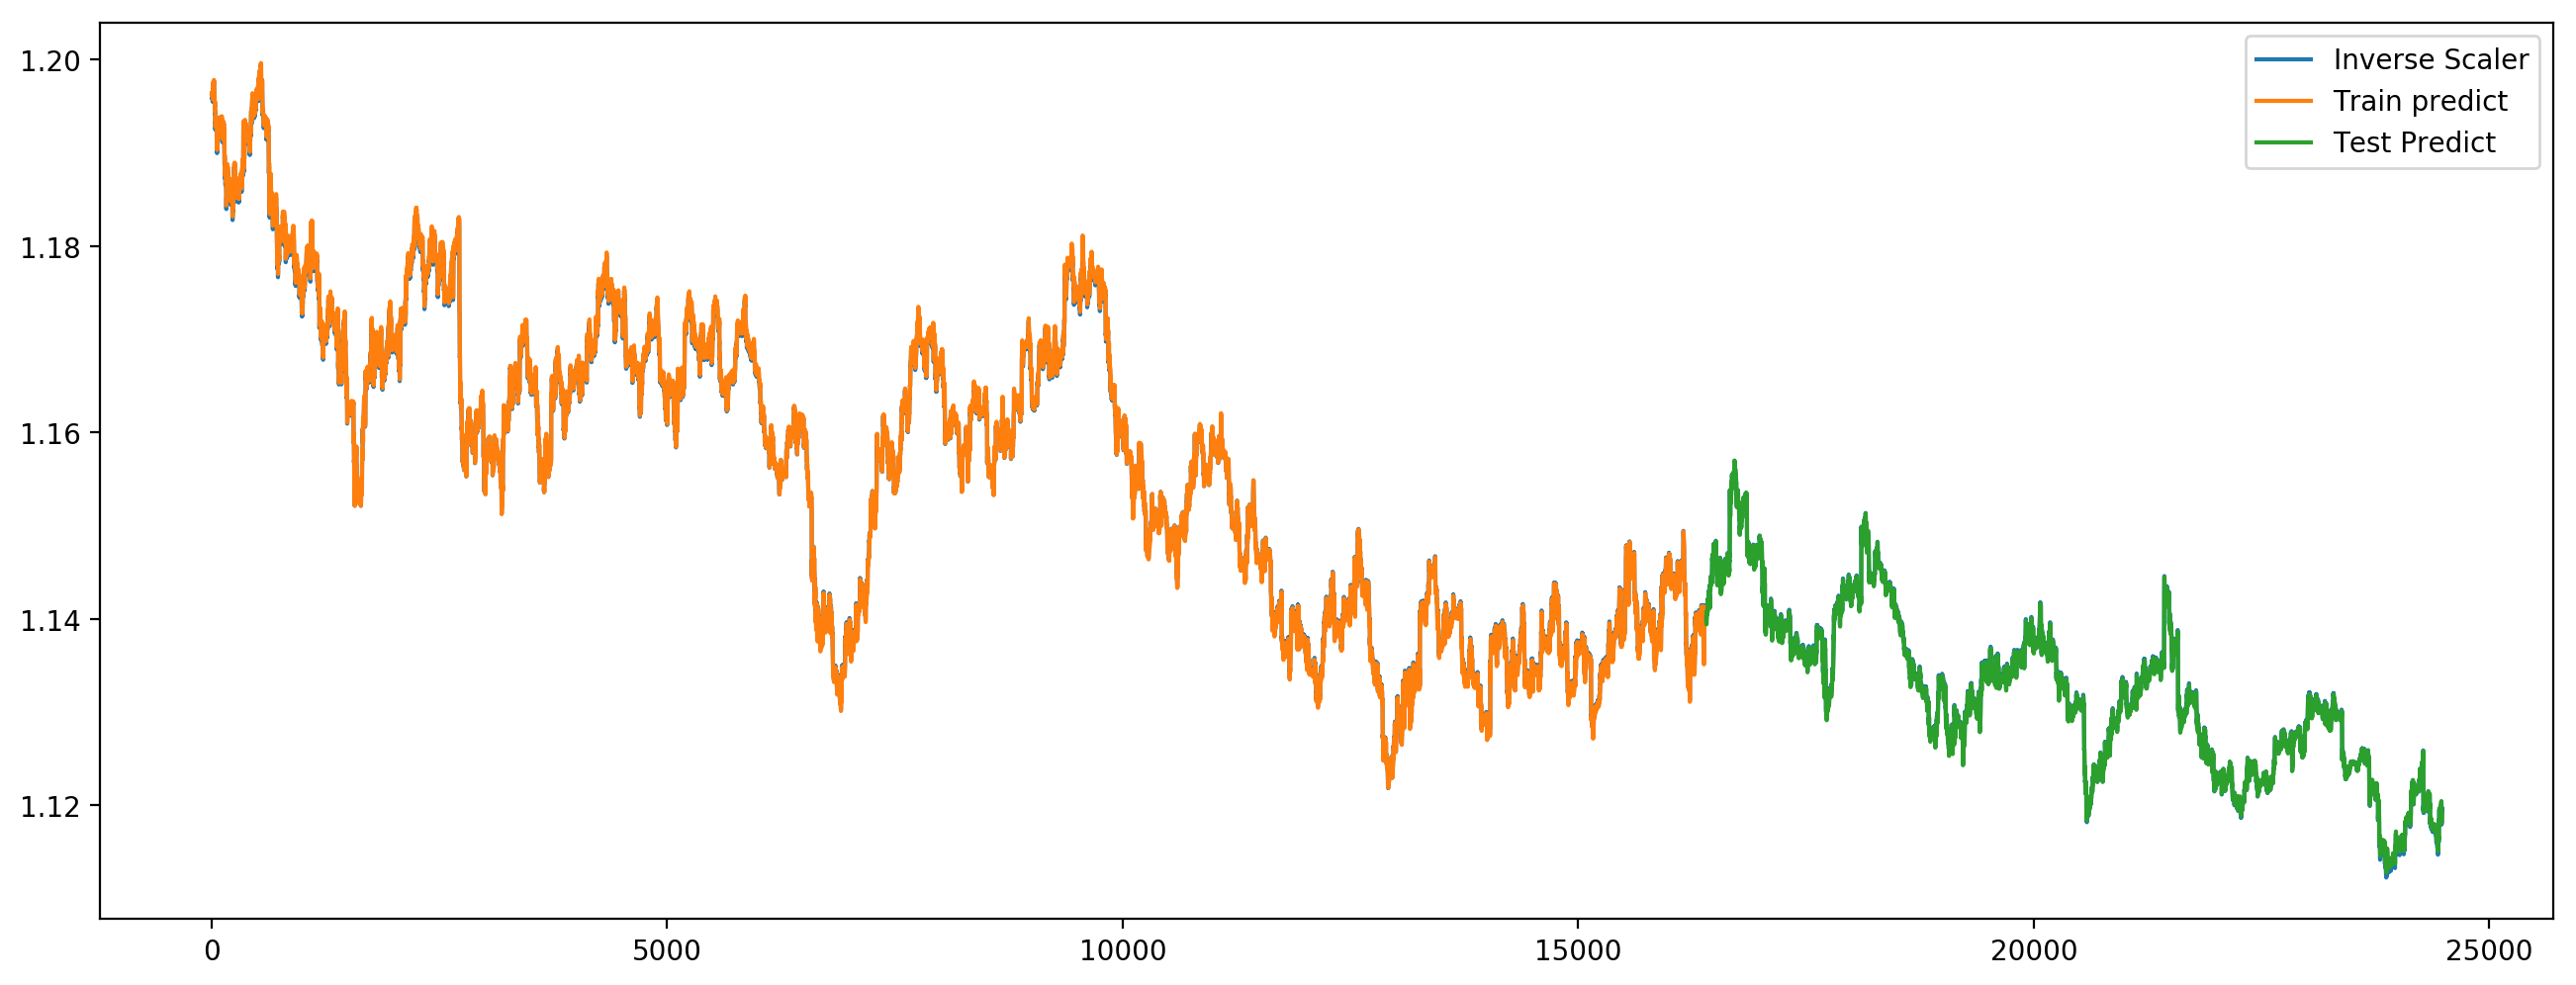

In [15]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predicZtions
plt.figure(figsize=(16,6),dpi=200)
plt.plot(scaler.inverse_transform(dataset),label='Inverse Scaler')
plt.plot(trainPredictPlot,label='Train predict')
plt.plot(testPredictPlot,label = 'Test Predict')
plt.legend()
plt.show()

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
Predictions = []
Real = []
result = []
error= []

for i in range(0,len(testPredict)):
    if scaler.inverse_transform(testX[i])[0][look_back - 1] - testPredict[i] < 0:
        Predictions.append('Sell')
    else:
        Predictions.append('Buy')
    
    if scaler.inverse_transform(testX[i])[0][look_back - 1] - testY[0][i] < 0:
        Real.append('Sell')
    else:
        Real.append('Buy')
    
    if Predictions[i] == Real[i]:
        result.append(True)
    else:
        result.append(False)
    
    error.append(math.sqrt((scaler.inverse_transform(testX[i])[0][look_back - 1] - testPredict[i])*
            (scaler.inverse_transform(testX[i])[0][look_back - 1] - testPredict[i])))

In [18]:
freq = pd.DataFrame({'col':result})
freq.describe()

col
count   8078
unique     2
top     True
freq    4096

In [19]:
mse = pd.DataFrame({'col':error})
mse.describe()

col
count  8078.000000
mean      0.000138
std       0.000074
min       0.000000
25%       0.000091
50%       0.000151
75%       0.000180
max       0.000533

In [20]:
freq.describe()['col'][3]/freq.describe()['col'][0]

0.5070562020302055

In [23]:
accuracy = freq.describe()['col'][3]/freq.describe()['col'][0]
data_history.append([round(accuracy*100),epochs_custom,look_back,testScore,trainScore,mse.describe()['col'][3]])
df = pd.DataFrame(data_history,columns=['accuracy','epochs','look_back','trainScore','testScore','mse'])

In [24]:
df.head()

accuracy  epochs  look_back  trainScore  testScore  mse
0      51.0      10          1    0.431497     0.5868  0.0

In [25]:
#testPredict[:,0].shape,testY[:,1].shape
testY[0,:]

array([1.13979992, 1.13979493, 1.13966504, ..., 1.11882996, 1.11893996,
       1.11976006])

In [26]:
final_cut = pd.DataFrame()
final_cut['Actual'] = testY[0,:]
final_cut['Prediction'] = testPredict[:,0]
final_cut['Delta'] = (final_cut['Actual'] - final_cut['Prediction'])
final_cut.tail(15)

Actual  Prediction     Delta
8063  1.119380    1.119965 -0.000585
8064  1.119645    1.119520  0.000125
8065  1.119870    1.119774  0.000096
8066  1.119780    1.119989 -0.000209
8067  1.119960    1.119903  0.000057
8068  1.120140    1.120075  0.000065
8069  1.120335    1.120248  0.000087
8070  1.120325    1.120435 -0.000110
8071  1.120170    1.120426 -0.000256
8072  1.117915    1.120277 -0.002362
8073  1.118040    1.118121 -0.000081
8074  1.117990    1.118240 -0.000250
8075  1.118830    1.118192  0.000638
8076  1.118940    1.118994 -0.000054
8077  1.119760    1.119099  0.000661

In [27]:
final = final_cut
final['Prediction'] = final['Prediction'].shift(1)
final['Delta'] = (final['Actual'] - final['Prediction'])
final.tail(15)

Actual  Prediction     Delta
8063  1.119380    1.119438 -0.000058
8064  1.119645    1.119965 -0.000320
8065  1.119870    1.119520  0.000350
8066  1.119780    1.119774  0.000006
8067  1.119960    1.119989 -0.000029
8068  1.120140    1.119903  0.000237
8069  1.120335    1.120075  0.000260
8070  1.120325    1.120248  0.000077
8071  1.120170    1.120435 -0.000265
8072  1.117915    1.120426 -0.002511
8073  1.118040    1.120277 -0.002237
8074  1.117990    1.118121 -0.000131
8075  1.118830    1.118240  0.000590
8076  1.118940    1.118192  0.000748
8077  1.119760    1.118994  0.000766

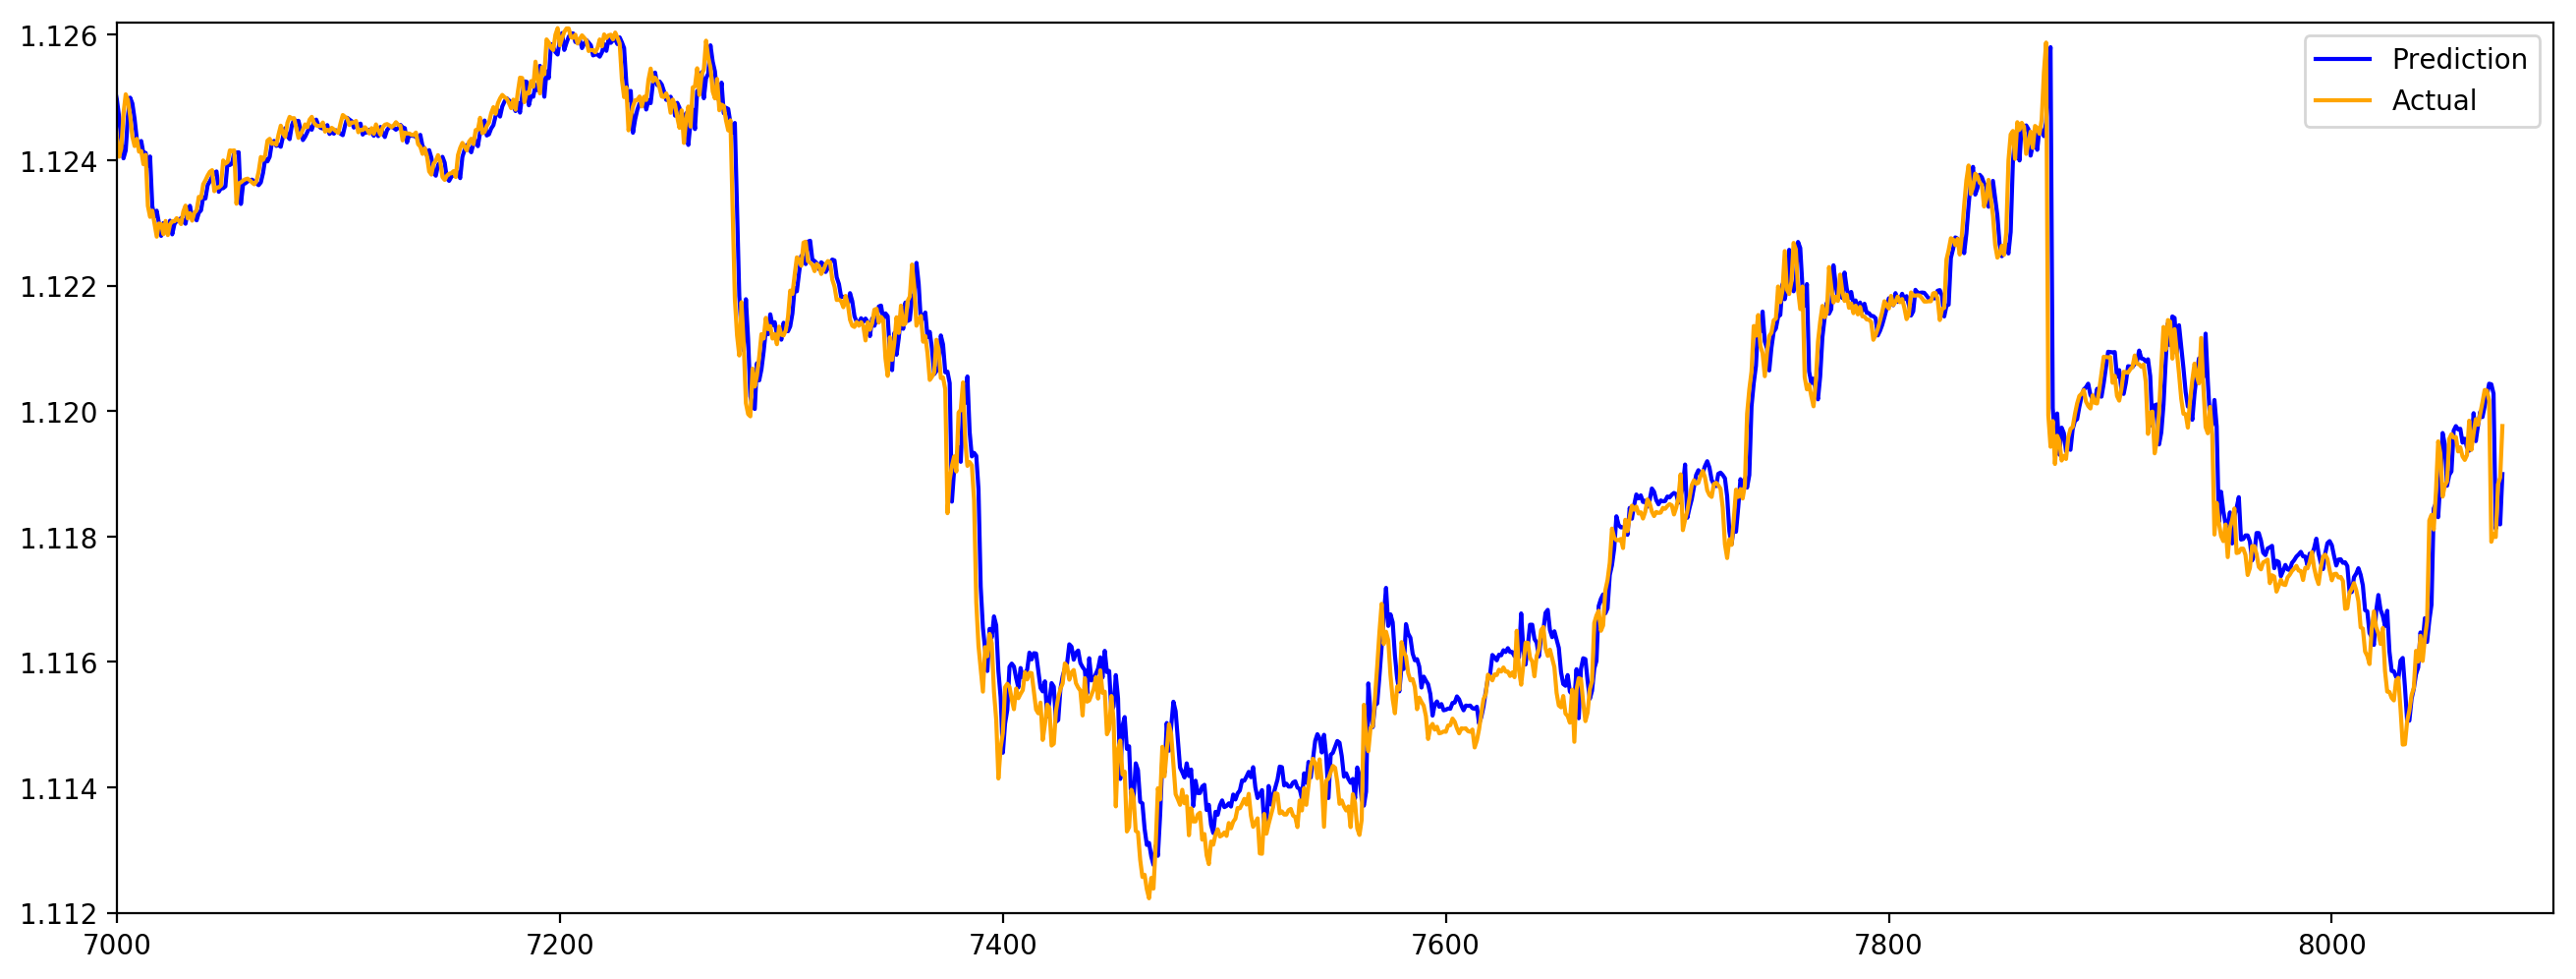

In [28]:
plt.figure(figsize=(16,6),dpi=200)
plt.xlim(7000,8100)
plt.ylim(1.1120,1.1262)
plt.plot(final_cut['Prediction'],label = 'Prediction',color='b')
plt.plot(final_cut['Actual'],label='Actual',color='orange')
plt.legend()
